# Crude Model
author: Sakin Kirti<br>
date: 03/19/2023<br><br>
A crude model for a first pass at building a probabilistic graphical model to predict heart failure

Keep in mind:
- This model is fit based on correlations found in the data rather than causative factors that we can manually set. Therefore, results should be taken with a grain of salt as power will likely be greater as we set connections based on evidence.
- This model was set up in literal minutes. There should be much more attention paid to data wrangling, upsampling, and exploration so that we can better understand how to use the data

In [7]:
import numpy as np
import pandas as pd

import networkx as nx
from pgmpy.estimators import HillClimbSearch
from matplotlib import pyplot as plt

from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination

Import the data from csv file - in the future, the data will have to cleaned to ensure it is evenly split in outcome and proportions of traits are approximately equal to how they are observed in the population

In [8]:
data = pd.read_csv("UHsurv1500_withZeroFE.csv")
data.head()

,AgatstonScore2D,MassScore,VolumeScore,Area2D,NumLesion3D,isAgZero,AgatstonScore3D,isLesion3DBelow5,Age,isAgeBelow60,...,ICmeanMomentH2,ICmeanMomentH3,ICskewnesstMomentH1,ICskewnesstMomentH2,ICskewnesstMomentH3,ICkurtosisMomentH1,ICkurtosisMomentH2,ICkurtosisMomentH3,Time,Status
0,38.146973,5.324782,37.765503,15.106201,1,False,50.354004,True,61,False,...,5.711942,3.557781,2.565725,2.287119,0.974375,2.953309,3.076700,2.858016,104,0
1,74.160576,11.911143,82.431793,32.972717,2,False,104.862213,True,65,False,...,5.013292,2.922836,3.337986,2.402399,0.870613,3.277002,3.248232,2.911082,642,0
2,88.413556,13.951670,81.658363,32.663345,3,False,95.963478,True,84,False,...,21.370782,5.834826,34.207528,35.952442,5.134972,2.652832,2.642296,2.605456,635,1
3,716.765938,0.982489,9.476852,230.224335,2,False,5.370216,True,80,False,...,3.677168,1.844542,0.136258,0.177513,0.054845,1.915504,1.901077,1.904156,300,1
4,446.760742,69.292085,517.397461,172.795898,14,False,492.311523,False,58,True,...,13.813606,5.981036,21.602994,31.398427,8.830517,3.733239,3.725690,3.694552,1923,0


Create the crude model using a HillClimbSearch, show the graph

In [9]:
est = HillClimbSearch(data)
graph = est.estimate()

  0%|          | 3/1000000 [01:58<7665:52:58, 27.60s/it]  

: 

: 

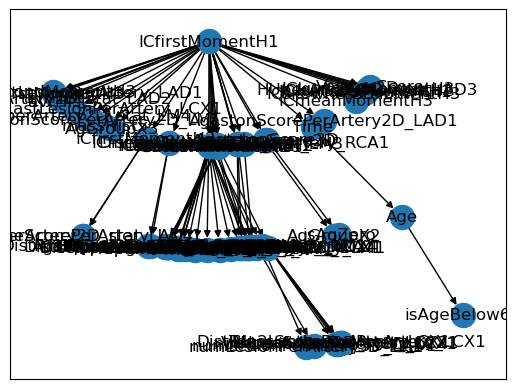

In [ ]:
nx_graph = nx.DiGraph(graph.edges())
nx.draw_networkx(nx_graph, pos=nx.kamada_kawai_layout(nx_graph))
plt.show()

Based on this graph, we can now create a simple Bayesian Network

In [ ]:
# create the model and fit the data
model = BayesianNetwork(graph)
model.fit(data)

# create an inference model
hd_infer = VariableElimination(model)

Test some queries